전이학습
- hand 훈련모델을 hand, chest로 각각 테스트하고
- chest 훈련모델을 chest, hand로 각각 테스트
- 성능을 높여보자

In [600]:
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import asarray
from numpy.random import randn
from numpy.random import randint
from keras.datasets.mnist import load_data
from tensorflow.keras.optimizers import Adam
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras.layers import Lambda
from keras.layers import Activation
from matplotlib import pyplot
from keras import backend

import tensorflow as tf
import pandas as pd
import numpy as np
import glob
import os
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import StandardScaler
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import scale

from sklearn.preprocessing import StandardScaler, LabelEncoder

In [601]:
df=pd.read_csv('./drive/MyDrive/pamap2.csv', index_col=0)
df

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
2932,37.70,1,100.0,30.3750,2.301060,7.25857,6.09259,2.207200,7.24042,5.95555,...,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1.000000,0.000000,0.000000,0.000000,1
2943,37.81,1,100.0,30.3750,2.246150,7.48180,5.55219,2.251300,7.40595,5.65313,...,-0.017912,0.015243,-60.7820,-36.2116,-58.4891,1.000000,0.000000,0.000000,0.000000,1
2954,37.92,1,100.0,30.3750,2.300000,7.10681,6.09309,2.346130,7.46611,6.12103,...,-0.011798,0.011387,-61.4531,-36.2983,-58.4845,1.000000,0.000000,0.000000,0.000000,1
2965,38.03,1,100.0,30.3750,2.494550,7.52335,6.17157,2.591060,7.76653,6.27112,...,-0.009233,0.005823,-62.0065,-36.7217,-58.3608,1.000000,0.000000,0.000000,0.000000,1
2976,38.14,1,101.0,30.3750,2.716540,8.30596,4.78671,2.595960,7.94641,4.86635,...,-0.042562,-0.009289,-60.4311,-37.5412,-59.0013,1.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818402,3629.66,5,195.0,30.8125,0.565086,2.59595,9.27677,0.660681,2.70904,9.44024,...,-0.002287,-0.017737,-17.6912,12.0079,26.5782,0.164776,0.798149,0.227263,0.533065,8
2818413,3629.77,5,195.0,30.8125,0.570697,2.82459,9.39155,0.495537,2.75557,9.47051,...,-0.007246,0.007512,-17.6928,12.0076,26.4364,0.166393,0.797223,0.228965,0.533221,8
2818423,3629.87,5,195.0,30.8125,0.756704,2.78452,9.31749,0.781122,2.72325,9.40988,...,0.003818,0.017649,-17.9459,11.7619,26.1521,0.166735,0.797039,0.229771,0.533041,8
2818435,3629.99,5,195.0,30.8125,0.530504,2.67279,9.35297,0.540382,2.87591,9.30409,...,-0.003649,-0.002610,-18.2103,12.4200,26.5759,0.168936,0.795763,0.231222,0.533628,8


In [602]:
df.columns

Index(['timestamp', 'activityID', 'heartrate', 'handTemperature',
       'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 'handAcc6_1', 'handAcc6_2',
       'handAcc6_3', 'handGyro1', 'handGyro2', 'handGyro3', 'handMagne1',
       'handMagne2', 'handMagne3', 'handOrientation1', 'handOrientation2',
       'handOrientation3', 'handOrientation4', 'chestTemperature',
       'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 'chestAcc6_1',
       'chestAcc6_2', 'chestAcc6_3', 'chestGyro1', 'chestGyro2', 'chestGyro3',
       'chestMagne1', 'chestMagne2', 'chestMagne3', 'chestOrientation1',
       'chestOrientation2', 'chestOrientation3', 'chestOrientation4',
       'ankleTemperature', 'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3',
       'ankleAcc6_1', 'ankleAcc6_2', 'ankleAcc6_3', 'ankleGyro1', 'ankleGyro2',
       'ankleGyro3', 'ankleMagne1', 'ankleMagne2', 'ankleMagne3',
       'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3',
       'ankleOrientation4', 'subject_id'],
      dtype=

In [603]:
label = LabelEncoder()
df['activityID'] = label.fit_transform(df['activityID'])
df.head()

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
2932,37.70,0,100.0,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,...,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1.0,0.0,0.0,0.0,1
2943,37.81,0,100.0,30.375,2.24615,7.48180,5.55219,2.25130,7.40595,5.65313,...,-0.017912,0.015243,-60.7820,-36.2116,-58.4891,1.0,0.0,0.0,0.0,1
2954,37.92,0,100.0,30.375,2.30000,7.10681,6.09309,2.34613,7.46611,6.12103,...,-0.011798,0.011387,-61.4531,-36.2983,-58.4845,1.0,0.0,0.0,0.0,1
2965,38.03,0,100.0,30.375,2.49455,7.52335,6.17157,2.59106,7.76653,6.27112,...,-0.009233,0.005823,-62.0065,-36.7217,-58.3608,1.0,0.0,0.0,0.0,1
2976,38.14,0,101.0,30.375,2.71654,8.30596,4.78671,2.59596,7.94641,4.86635,...,-0.042562,-0.009289,-60.4311,-37.5412,-59.0013,1.0,0.0,0.0,0.0,1


In [604]:
df['activityID'].value_counts()

3    20998
0    17575
2    17256
1    16881
5    16857
6    10699
7     9585
4     8665
Name: activityID, dtype: int64

In [605]:
#hand
h_X=df[['handAcc16_1', 'handAcc16_2', 'handAcc16_3', 'handAcc6_1', 'handAcc6_2',
       'handAcc6_3', 'handGyro1', 'handGyro2', 'handGyro3', 'handMagne1',
       'handMagne2', 'handMagne3']]
h_y=df['activityID']

#chest
c_X=df[['chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 'chestAcc6_1',
       'chestAcc6_2', 'chestAcc6_3', 'chestGyro1', 'chestGyro2', 'chestGyro3',
       'chestMagne1', 'chestMagne2', 'chestMagne3']]
c_y=df['activityID']

In [606]:
#scale
scaler = StandardScaler()

h_X= scaler.fit_transform(h_X)

scaled_h_X=pd.DataFrame(data=h_X, columns=['handAcc16_1', 'handAcc16_2', 'handAcc16_3', 'handAcc6_1', 'handAcc6_2',
       'handAcc6_3', 'handGyro1', 'handGyro2', 'handGyro3', 'handMagne1',
       'handMagne2', 'handMagne3'])
scaled_h_X['label']=h_y.values



c_X= scaler.fit_transform(c_X)

scaled_c_X=pd.DataFrame(data=c_X, columns=['chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 'chestAcc6_1',
       'chestAcc6_2', 'chestAcc6_3', 'chestGyro1', 'chestGyro2', 'chestGyro3',
       'chestMagne1', 'chestMagne2', 'chestMagne3'])

scaled_c_X['label']=c_y.values

In [607]:
from sklearn.model_selection import train_test_split

h_X_train, h_X_test, h_y_train, h_y_test = train_test_split(scaled_h_X,
                                                    scaled_h_X['label'],
                                                    test_size = 0.95,
                                                    shuffle = True,
                                                    random_state = 21)

c_X_train, c_X_test, c_y_train, c_y_test = train_test_split(scaled_c_X,
                                                    scaled_c_X['label'],
                                                    test_size = 0.95,
                                                    shuffle = True,
                                                    random_state = 21)

##value_counts()

In [608]:
h_X_train['label'].value_counts()

3    1087
2     876
5     856
0     842
1     805
6     539
4     473
7     447
Name: label, dtype: int64

In [609]:
h_X_test['label'].value_counts()

3    19911
0    16733
2    16380
1    16076
5    16001
6    10160
7     9138
4     8192
Name: label, dtype: int64

In [610]:
c_X_train['label'].value_counts()

3    1087
2     876
5     856
0     842
1     805
6     539
4     473
7     447
Name: label, dtype: int64

In [611]:
c_X_test['label'].value_counts()

3    19911
0    16733
2    16380
1    16076
5    16001
6    10160
7     9138
4     8192
Name: label, dtype: int64

#Split

In [612]:
#TIME_STEPS : The length of the time segment.
#STEP : Determines the amount of overlap between two consecutive time segments.


TIME_PERIODS = 40

STEP_DISTANCE = 10

In [613]:
print(h_X_train.shape, h_X_test.shape)
print(h_y_train.shape, h_y_test.shape)

(5925, 13) (112591, 13)
(5925,) (112591,)


In [614]:
from scipy import stats

def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)
        ys.append(stats.mode(labels)[0])

    return np.array(Xs), np.array(ys).reshape(-1, 1)

TIME_STEPS = 1
STEP = 1

h_X_train, h_y_train=create_dataset(h_X_train[['handAcc16_1', 'handAcc16_2', 'handAcc16_3', 'handAcc6_1', 'handAcc6_2',
       'handAcc6_3', 'handGyro1', 'handGyro2', 'handGyro3', 'handMagne1',
       'handMagne2', 'handMagne3']], h_X_train.label, TIME_STEPS, STEP)

h_X_test, h_y_test=create_dataset(h_X_test[['handAcc16_1', 'handAcc16_2', 'handAcc16_3', 'handAcc6_1', 'handAcc6_2',
       'handAcc6_3', 'handGyro1', 'handGyro2', 'handGyro3', 'handMagne1',
       'handMagne2', 'handMagne3']], h_X_test.label, TIME_STEPS, STEP)

print(h_X_train.shape, h_y_train.shape)

(5924, 1, 12) (5924, 1)


In [615]:
c_X_train, c_y_train=create_dataset(c_X_train[['chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 'chestAcc6_1',
       'chestAcc6_2', 'chestAcc6_3', 'chestGyro1', 'chestGyro2', 'chestGyro3',
       'chestMagne1', 'chestMagne2', 'chestMagne3']], c_X_train.label, TIME_STEPS, STEP)

c_X_test, c_y_test=create_dataset(c_X_test[['chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 'chestAcc6_1',
       'chestAcc6_2', 'chestAcc6_3', 'chestGyro1', 'chestGyro2', 'chestGyro3',
       'chestMagne1', 'chestMagne2', 'chestMagne3']], c_X_test.label, TIME_STEPS, STEP)

print(c_X_train.shape, c_y_train.shape)

(5924, 1, 12) (5924, 1)


In [616]:
##One-Hot Encoding

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown = "ignore", sparse = False)
enc = enc.fit(h_y_train)

h_y_train = enc.transform(h_y_train)
h_y_test = enc.transform(h_y_test)

enc2 = OneHotEncoder(handle_unknown = "ignore", sparse = False)
enc2 = enc2.fit(c_y_train)

c_y_train = enc.transform(c_y_train)
c_y_test = enc.transform(c_y_test)



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [617]:
print("===hand data===")
print("X_train.shape: ", h_X_train.shape)
print("X_test.shape ", h_X_test.shape)
print("y_train.shape ", h_y_train.shape)
print("y_test.shape ", h_y_test.shape)

===hand data===
X_train.shape:  (5924, 1, 12)
X_test.shape  (112590, 1, 12)
y_train.shape  (5924, 8)
y_test.shape  (112590, 8)


In [618]:
print("===chest data===")
print("X_train.shape: ", c_X_train.shape)
print("X_test.shape ", c_X_test.shape)
print("y_train.shape ", c_y_train.shape)
print("y_test.shape ", c_y_test.shape)

===chest data===
X_train.shape:  (5924, 1, 12)
X_test.shape  (112590, 1, 12)
y_train.shape  (5924, 8)
y_test.shape  (112590, 8)


##Deep Learning

In [619]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# cnn model vary kernel size
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPooling1D

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

###hand train - hand test

In [620]:
#Epoch 500

verbose,epochs,batch_size=1,10,32

n_timesteps,n_features,n_outputs=h_X_train.shape[1],h_X_train.shape[2],h_y_train.shape[1]

n_timesteps, n_features, n_outputs

(1, 12, 8)

In [621]:
#MODEL

model = Sequential()

model.add(LSTM(64,input_shape = [n_timesteps, n_features], return_sequences=True))

model.add(LSTM(128))

model.add(Dropout(0.3))

model.add(Dense(64, activation="relu"))

model.add(Dropout(0.5))

model.add(Dense(n_outputs, activation = "softmax"))
model.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_54 (LSTM)              (None, 1, 64)             19712     
                                                                 
 lstm_55 (LSTM)              (None, 128)               98816     
                                                                 
 dropout_54 (Dropout)        (None, 128)               0         
                                                                 
 dense_67 (Dense)            (None, 64)                8256      
                                                                 
 dropout_55 (Dropout)        (None, 64)                0         
                                                                 
 dense_68 (Dense)            (None, 8)                 520       
                                                                 
Total params: 127304 (497.28 KB)
Trainable params: 12

In [622]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["acc"])

In [623]:
history = model.fit(h_X_train, h_y_train, epochs = epochs, batch_size = batch_size, validation_split = 0.1, shuffle = True)
print(model.summary())

Epoch 1/10
167/167 [==============================] - 7s 13ms/step - loss: 1.7614 - acc: 0.3806 - val_loss: 1.5109 - val_acc: 0.4503
Epoch 2/10
167/167 [==============================] - 1s 7ms/step - loss: 1.4197 - acc: 0.5189 - val_loss: 1.2844 - val_acc: 0.5902
Epoch 3/10
167/167 [==============================] - 1s 7ms/step - loss: 1.2596 - acc: 0.5920 - val_loss: 1.1064 - val_acc: 0.6189
Epoch 4/10
167/167 [==============================] - 1s 7ms/step - loss: 1.1287 - acc: 0.6417 - val_loss: 0.9981 - val_acc: 0.6678
Epoch 5/10
167/167 [==============================] - 1s 7ms/step - loss: 1.0611 - acc: 0.6646 - val_loss: 0.9323 - val_acc: 0.6813
Epoch 6/10
167/167 [==============================] - 1s 7ms/step - loss: 0.9978 - acc: 0.6779 - val_loss: 0.8911 - val_acc: 0.6981
Epoch 7/10
167/167 [==============================] - 1s 7ms/step - loss: 0.9504 - acc: 0.7032 - val_loss: 0.8461 - val_acc: 0.7167
Epoch 8/10
167/167 [==============================] - 1s 7ms/step - loss: 0

In [624]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_test_arg=np.argmax(h_y_test,axis=1)
Y_pred = np.argmax(model.predict(h_X_test),axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, Y_pred))

3519/3519 [==============================] - 11s 3ms/step
Confusion Matrix
[[15266   193   315   278    32   123   211   315]
 [   67 14110  1002   145    62   482    28   180]
 [  342  1050 13058   589    51   949   169   172]
 [   24   208   997 16694   161  1014   378   435]
 [   29   152   242   280  6948   477    19    44]
 [   43   602   141  1691   694 12682    35   113]
 [   24   359  1263  5211   247   815  1689   552]
 [  241   779  1049  2633   347   626   774  2689]]


In [625]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix


base_loss,base_accuracy=model.evaluate(h_X_test,h_y_test,batch_size=batch_size,verbose=1)

score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

3519/3519 [==============================] - 14s 4ms/step - loss: 0.8075 - acc: 0.7384
Accuracy >73.839593
Base Loss >0.81


###hand train - chest test

In [626]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix


base_loss,base_accuracy=model.evaluate(c_X_test,c_y_test,batch_size=batch_size,verbose=1)

score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

3519/3519 [==============================] - 18s 5ms/step - loss: 2.3240 - acc: 0.2683
Accuracy >26.828316
Base Loss >2.32


###chest train - chest test

In [627]:
#Epoch 500

verbose,epochs,batch_size=1,10,32

n_timesteps,n_features,n_outputs=c_X_train.shape[1],c_X_train.shape[2],c_y_train.shape[1]

n_timesteps, n_features, n_outputs

(1, 12, 8)

In [628]:
#MODEL

model = Sequential()

model.add(LSTM(64,input_shape = [n_timesteps, n_features], return_sequences=True))

model.add(LSTM(128))

model.add(Dropout(0.3))

model.add(Dense(64, activation="relu"))

model.add(Dropout(0.5))

model.add(Dense(n_outputs, activation = "softmax"))
model.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_56 (LSTM)              (None, 1, 64)             19712     
                                                                 
 lstm_57 (LSTM)              (None, 128)               98816     
                                                                 
 dropout_56 (Dropout)        (None, 128)               0         
                                                                 
 dense_69 (Dense)            (None, 64)                8256      
                                                                 
 dropout_57 (Dropout)        (None, 64)                0         
                                                                 
 dense_70 (Dense)            (None, 8)                 520       
                                                                 
Total params: 127304 (497.28 KB)
Trainable params: 12

In [629]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["acc"])

In [630]:
history = model.fit(c_X_train, c_y_train, epochs = epochs, batch_size = batch_size, validation_split = 0.1, shuffle = True)
print(model.summary())

Epoch 1/10
167/167 [==============================] - 6s 13ms/step - loss: 1.7275 - acc: 0.3442 - val_loss: 1.3695 - val_acc: 0.4570
Epoch 2/10
167/167 [==============================] - 2s 9ms/step - loss: 1.3205 - acc: 0.4898 - val_loss: 1.1004 - val_acc: 0.5936
Epoch 3/10
167/167 [==============================] - 2s 9ms/step - loss: 1.1519 - acc: 0.5721 - val_loss: 0.9787 - val_acc: 0.6341
Epoch 4/10
167/167 [==============================] - 1s 8ms/step - loss: 1.0646 - acc: 0.6096 - val_loss: 0.9014 - val_acc: 0.6830
Epoch 5/10
167/167 [==============================] - 1s 7ms/step - loss: 1.0007 - acc: 0.6368 - val_loss: 0.8585 - val_acc: 0.6728
Epoch 6/10
167/167 [==============================] - 1s 7ms/step - loss: 0.9570 - acc: 0.6573 - val_loss: 0.8187 - val_acc: 0.6981
Epoch 7/10
167/167 [==============================] - 1s 7ms/step - loss: 0.9096 - acc: 0.6753 - val_loss: 0.8004 - val_acc: 0.6998
Epoch 8/10
167/167 [==============================] - 1s 7ms/step - loss: 0

In [631]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix


base_loss,base_accuracy=model.evaluate(c_X_test,c_y_test,batch_size=batch_size,verbose=1)

score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

3519/3519 [==============================] - 14s 4ms/step - loss: 0.8205 - acc: 0.6922
Accuracy >69.215739
Base Loss >0.82


###chest train - hand test

In [632]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix


base_loss,base_accuracy=model.evaluate(h_X_test,h_y_test,batch_size=batch_size,verbose=1)

score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

3519/3519 [==============================] - 14s 4ms/step - loss: 3.9616 - acc: 0.1758
Accuracy >17.578825
Base Loss >3.96


Save chest trained base model

In [633]:
cnn_file='./drive/MyDrive/chest_CNN_Model.h5'

tf.keras.models.save_model(model, cnn_file, include_optimizer=False)
print('model saved at ', cnn_file)

model saved at  ./drive/MyDrive/chest_CNN_Model.h5


<ipython-input-633-a838c996d8c7>:3: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model, cnn_file, include_optimizer=False)


##Fine-Tuning

Chest data를 훈련한 모델을 save한 뒤 불러와 전이학습

In [634]:
# Base 모델을 로드

base_model = keras.models.load_model(cnn_file)

In [635]:
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = len(base_model.layers)-1

# Freeze all the layers before the `fine_tune_at` layer 전부 동결
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

# 동결 후 레이어 추가
new_model = keras.models.Sequential(base_model.layers[:-1])
new_model.add(keras.layers.Dense(n_outputs, activation='sigmoid'))

new_model.compile(loss="categorical_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])

Number of layers in the base model:  6


In [636]:
# 동결 확인
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in base_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.src.layers.rnn.lstm.LSTM object at 0x78...,lstm_56,False
1,<keras.src.layers.rnn.lstm.LSTM object at 0x78...,lstm_57,False
2,<keras.src.layers.regularization.dropout.Dropo...,dropout_56,False
3,<keras.src.layers.core.dense.Dense object at 0...,dense_69,False
4,<keras.src.layers.regularization.dropout.Dropo...,dropout_57,False
5,<keras.src.layers.core.dense.Dense object at 0...,dense_70,True


hand data 적재 학습

In [637]:
history2 = new_model.fit(h_X_train, h_y_train, epochs = epochs, batch_size = batch_size, validation_split = 0.1, shuffle = True)
new_model.summary()

Epoch 1/10
167/167 [==============================] - 6s 10ms/step - loss: 2.3982 - accuracy: 0.1660 - val_loss: 2.1350 - val_accuracy: 0.2530
Epoch 2/10
167/167 [==============================] - 1s 5ms/step - loss: 2.2990 - accuracy: 0.1876 - val_loss: 2.0693 - val_accuracy: 0.2546
Epoch 3/10
167/167 [==============================] - 1s 5ms/step - loss: 2.2406 - accuracy: 0.1986 - val_loss: 2.0234 - val_accuracy: 0.2428
Epoch 4/10
167/167 [==============================] - 1s 5ms/step - loss: 2.1951 - accuracy: 0.2030 - val_loss: 1.9880 - val_accuracy: 0.2344
Epoch 5/10
167/167 [==============================] - 1s 5ms/step - loss: 2.1581 - accuracy: 0.2093 - val_loss: 1.9587 - val_accuracy: 0.2327
Epoch 6/10
167/167 [==============================] - 1s 5ms/step - loss: 2.1374 - accuracy: 0.2187 - val_loss: 1.9334 - val_accuracy: 0.2395
Epoch 7/10
167/167 [==============================] - 1s 5ms/step - loss: 2.1036 - accuracy: 0.2273 - val_loss: 1.9110 - val_accuracy: 0.2496
Epoch

미세조정

In [638]:
#동결 해제 후 컴파일, 새롭게 훈련
base_model.trainable = True
new_model.compile(loss="categorical_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])

In [639]:
#동결해제 확인
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in base_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.src.layers.rnn.lstm.LSTM object at 0x78...,lstm_56,True
1,<keras.src.layers.rnn.lstm.LSTM object at 0x78...,lstm_57,True
2,<keras.src.layers.regularization.dropout.Dropo...,dropout_56,True
3,<keras.src.layers.core.dense.Dense object at 0...,dense_69,True
4,<keras.src.layers.regularization.dropout.Dropo...,dropout_57,True
5,<keras.src.layers.core.dense.Dense object at 0...,dense_70,True


In [640]:
history2 = new_model.fit(h_X_train, h_y_train, epochs=epochs, batch_size = batch_size, validation_split = 0.1, shuffle = True)
new_model.summary()

Epoch 1/10
167/167 [==============================] - 6s 11ms/step - loss: 2.0187 - accuracy: 0.2585 - val_loss: 1.8274 - val_accuracy: 0.2985
Epoch 2/10
167/167 [==============================] - 1s 7ms/step - loss: 1.9853 - accuracy: 0.2643 - val_loss: 1.8030 - val_accuracy: 0.3153
Epoch 3/10
167/167 [==============================] - 1s 7ms/step - loss: 1.9524 - accuracy: 0.2767 - val_loss: 1.7821 - val_accuracy: 0.3322
Epoch 4/10
167/167 [==============================] - 1s 7ms/step - loss: 1.9418 - accuracy: 0.2834 - val_loss: 1.7616 - val_accuracy: 0.3406
Epoch 5/10
167/167 [==============================] - 1s 7ms/step - loss: 1.9180 - accuracy: 0.3013 - val_loss: 1.7450 - val_accuracy: 0.3626
Epoch 6/10
167/167 [==============================] - 1s 7ms/step - loss: 1.8886 - accuracy: 0.2919 - val_loss: 1.7294 - val_accuracy: 0.3693
Epoch 7/10
167/167 [==============================] - 1s 7ms/step - loss: 1.8604 - accuracy: 0.3118 - val_loss: 1.7151 - val_accuracy: 0.3794
Epoch

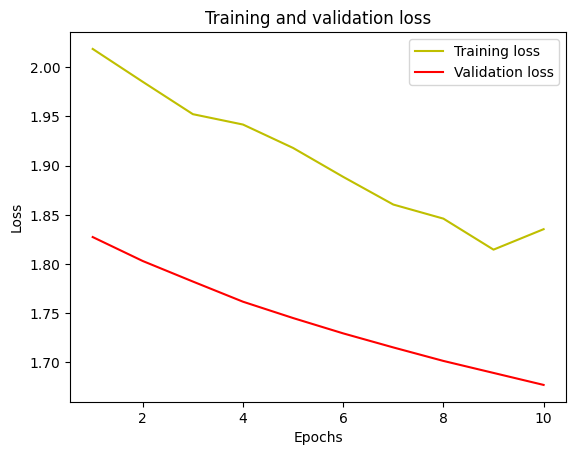

In [641]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

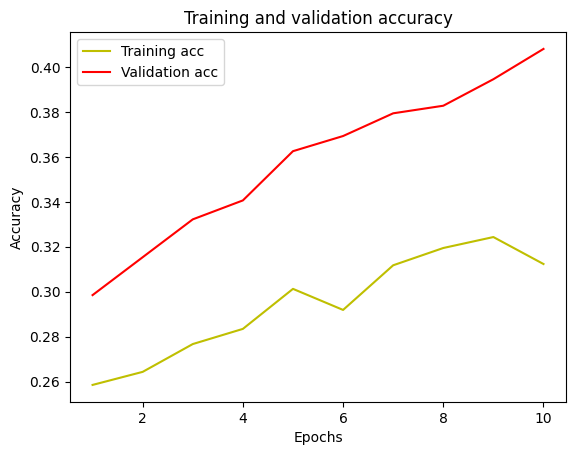

In [642]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [643]:
new_model.evaluate(h_X_test, h_y_test)
y_pred = new_model.predict(h_X_test)

3519/3519 [==============================] - 11s 3ms/step
